In [83]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [78]:
df = pd.read_csv("housing_price_dataset.csv")
print(df.head(12))

    SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0         2126         4          1        Rural       1969  215355.283618
1         2459         3          2        Rural       1980  195014.221626
2         1860         2          1       Suburb       1970  306891.012076
3         2294         2          1        Urban       1996  206786.787153
4         2130         5          2       Suburb       2001  272436.239065
5         2095         2          3       Suburb       2020  198208.803907
6         2724         2          1       Suburb       1993  343429.319110
7         2044         4          3        Rural       1957  184992.321268
8         2638         4          3        Urban       1959  377998.588152
9         1121         5          2        Urban       2004   95961.926014
10        1466         5          3       Suburb       1951  191113.768679
11        2238         3          3       Suburb       1987  253358.645002


In [79]:
df.Neighborhood.unique()

array(['Rural', 'Suburb', 'Urban'], dtype=object)

In [80]:
count = 0
for index,row in df.iterrows():
    if row['Neighborhood'] != None:
        count += 1
print(count)

50000


In [81]:
df = df.replace(['Rural'], 1.0)
df = df.replace(['Urban'], 0.0)
df = df.replace(['Suburb'], -1.0)

In [82]:
df.corr()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
SquareFeet,1.000000,-0.002638,-0.003275,0.001054,0.000482,0.750720
Bedrooms,-0.002638,1.000000,0.007405,0.004723,0.003147,0.072624
Bathrooms,-0.003275,0.007405,1.000000,-0.004745,0.003748,0.028418
Neighborhood,0.001054,0.004723,-0.004745,1.000000,-0.003197,0.004643
YearBuilt,0.000482,0.003147,0.003748,-0.003197,1.000000,-0.002288
Price,0.750720,0.072624,0.028418,0.004643,-0.002288,1.000000


In [84]:
train, test = train_test_split(df, test_size=0.25, random_state=42)

In [105]:
x_train = train.iloc[:,0:5]
y_train = train.iloc[:,-1]
x_test = test.iloc[:,0:5]
y_test = test.iloc[:,-1]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
33553,1894,5,1,1.0,1975
9427,1001,5,3,-1.0,1963
199,2264,4,3,-1.0,1964
12447,2299,5,1,-1.0,1999
39489,2651,2,1,-1.0,1951
...,...,...,...,...,...
9771,2094,3,2,1.0,1962
34737,1343,3,1,-1.0,1950
30390,1723,4,1,1.0,1981
6797,1804,5,3,0.0,1984


In [110]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

print(x_train_scaled.shape)
print(x_test_scaled.shape)

print(scaler.mean_)
print(scaler.scale_)

#print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
#print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")

(37500, 5)
(12500, 5)
[ 2.00715112e+03  3.48456000e+00  1.99056000e+00 -4.40000000e-03
  1.98553528e+03]
[576.67371499   1.12000072   0.81519991   0.81744764  20.7883803 ]


In [115]:
linear_model = LinearRegression()

x_train_val = x_train.values
x_test_val = x_test.values

linear_model.fit(x_train_scaled, y_train)

y_predict_train = linear_model.predict(x_train_scaled)
y_predict_test = linear_model.predict(x_test_scaled)

In [116]:
linear_model.score(x_test_scaled, y_test)

0.5737004741036544

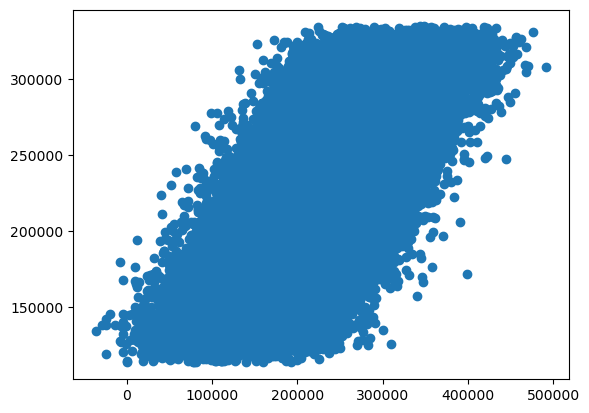

In [120]:
import matplotlib.pyplot as plt

x_axis = np.arange(1,12501,dtype=int)

plt.scatter(y_train,y_predict_train)
plt.show()

In [118]:
r2_score(y_true=y_test, y_pred=y_predict_test)

0.5737004741036544

In [119]:
mean_squared_error(y_true=y_test, y_pred=y_predict_test) 

2458822955.4567